# **DRY BEAN CLASSIFICATION**

### Importing libraries, data structure preview, and basic preprocessing

In [1]:
#Importing libraries and loading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_sample_weight

from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel(r"C:\Users\Moved Files\Desktop\Git Projects\DRY BEANS CLASSIFICATION\Data Archive\Dry_Bean_Dataset.xlsx")

In [2]:
#Data preview
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
#Data shape
data.shape

(13611, 17)

In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
#Checking for nulls
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
#Checking for duplicates
data.duplicated().sum()

68

In [7]:
#Dropping duplicates and confirming if dropped
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
#Statistical representation
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
#Distribution of classes
data['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [10]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

### Exploratory Data Analysis (EDA)

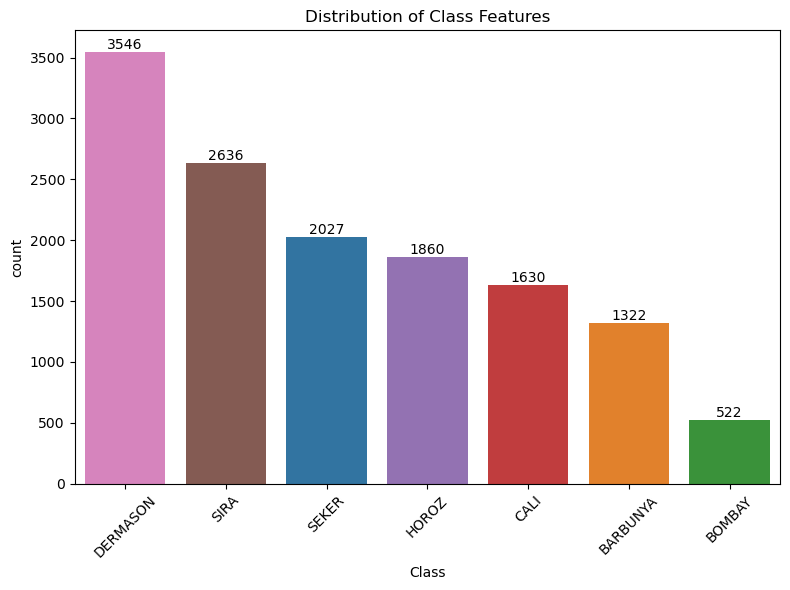

In [11]:
#Classes by frequency (most common to least)
class_order = data['Class'].value_counts().index

plt.figure(figsize=(8, 6))
ax = sns.countplot(data = data, x = 'Class', hue = 'Class', order = class_order)

#Adding count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 0.5,                     #a bit above the bar
            int(height),                      #the count value
            ha = 'center', va = 'bottom', fontsize = 10)

plt.title('Distribution of Class Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#Viewing the order of classes, in descending order
class_order

Index(['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'], dtype='object', name='Class')

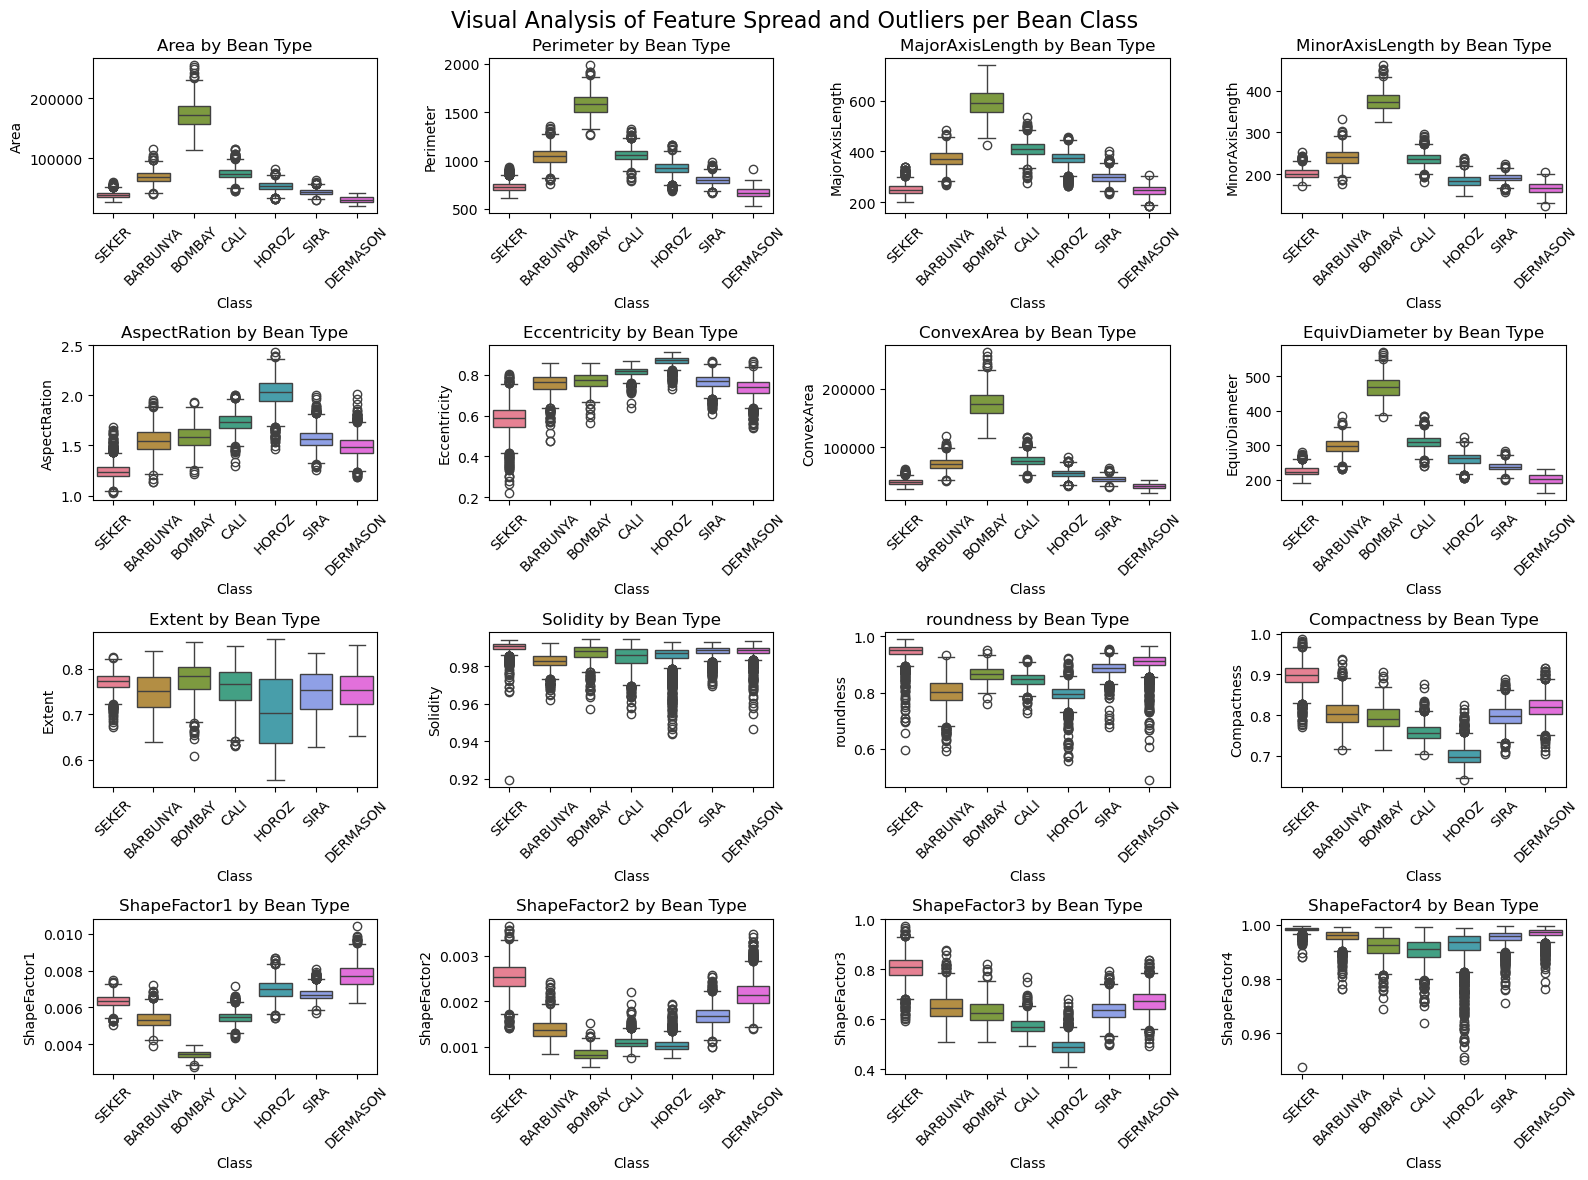

In [13]:
#Outlier Detection across features using boxplots
feature_col = data.columns[:-1]  #Removes the last column 'Class' from outlier eliminations

plt.figure(figsize=(16, 12))
plt.suptitle("Visual Analysis of Feature Spread and Outliers per Bean Class", size = 16)
for i, col in enumerate(feature_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = data, x = 'Class', y = col, palette = "husl", hue = 'Class')
    plt.title(f"{col} by Bean Type")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [14]:
#Outlier removal (IQR)
#Creating an empty DataFrame to collect cleaned data
cleaned_data = pd.DataFrame()

features = data.columns.drop('Class')

#Loop through each unique class
for clas in data['Class'].unique():
    class_data = data[data['Class'] == clas]  #Filter rows for that class

    #Loop through each feature and apply IQR filtering
    for feature in features:
        Q1 = class_data[feature].quantile(0.25)
        Q3 = class_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        class_data = class_data[(class_data[feature] >= lower) & (class_data[feature] <= upper)]

    #Adding cleaned class data to the final dataset
    cleaned_data = pd.concat([cleaned_data, class_data])
cleaned_data.shape

(11589, 17)

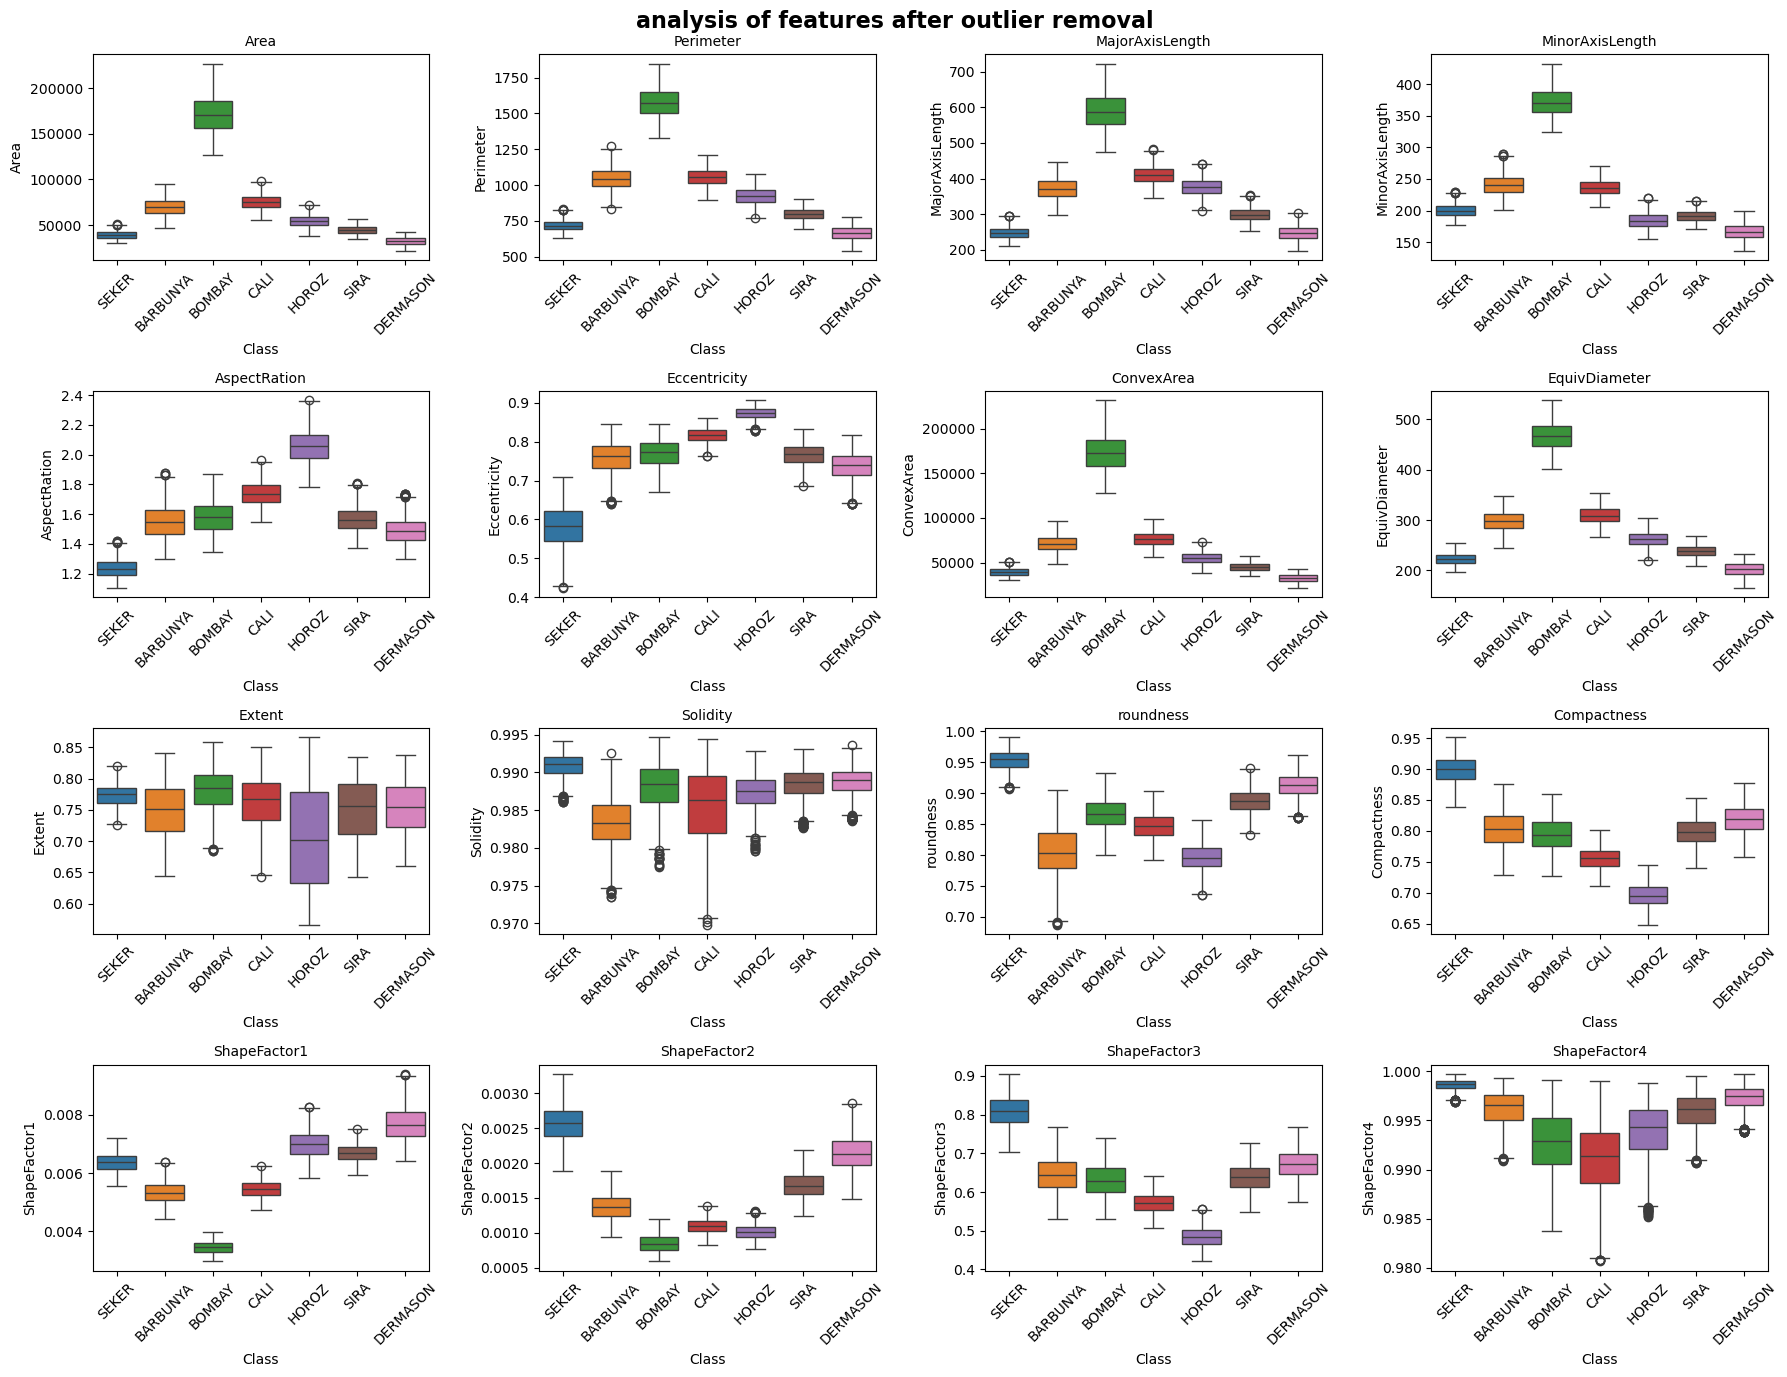

In [15]:
#Feature by class visualization after outlier removal

#Getting the feature names
features = cleaned_data.columns.drop('Class')

#Plotting boxplots after outlier removal
plt.figure(figsize = (18, 14))
plt.suptitle("analysis of features after outlier removal", fontsize = 16, weight = 'bold')

for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x = 'Class', y = feature, data = cleaned_data, hue = 'Class')
    plt.xticks(rotation=45)
    plt.title(feature, fontsize = 10)

plt.tight_layout()
plt.show()

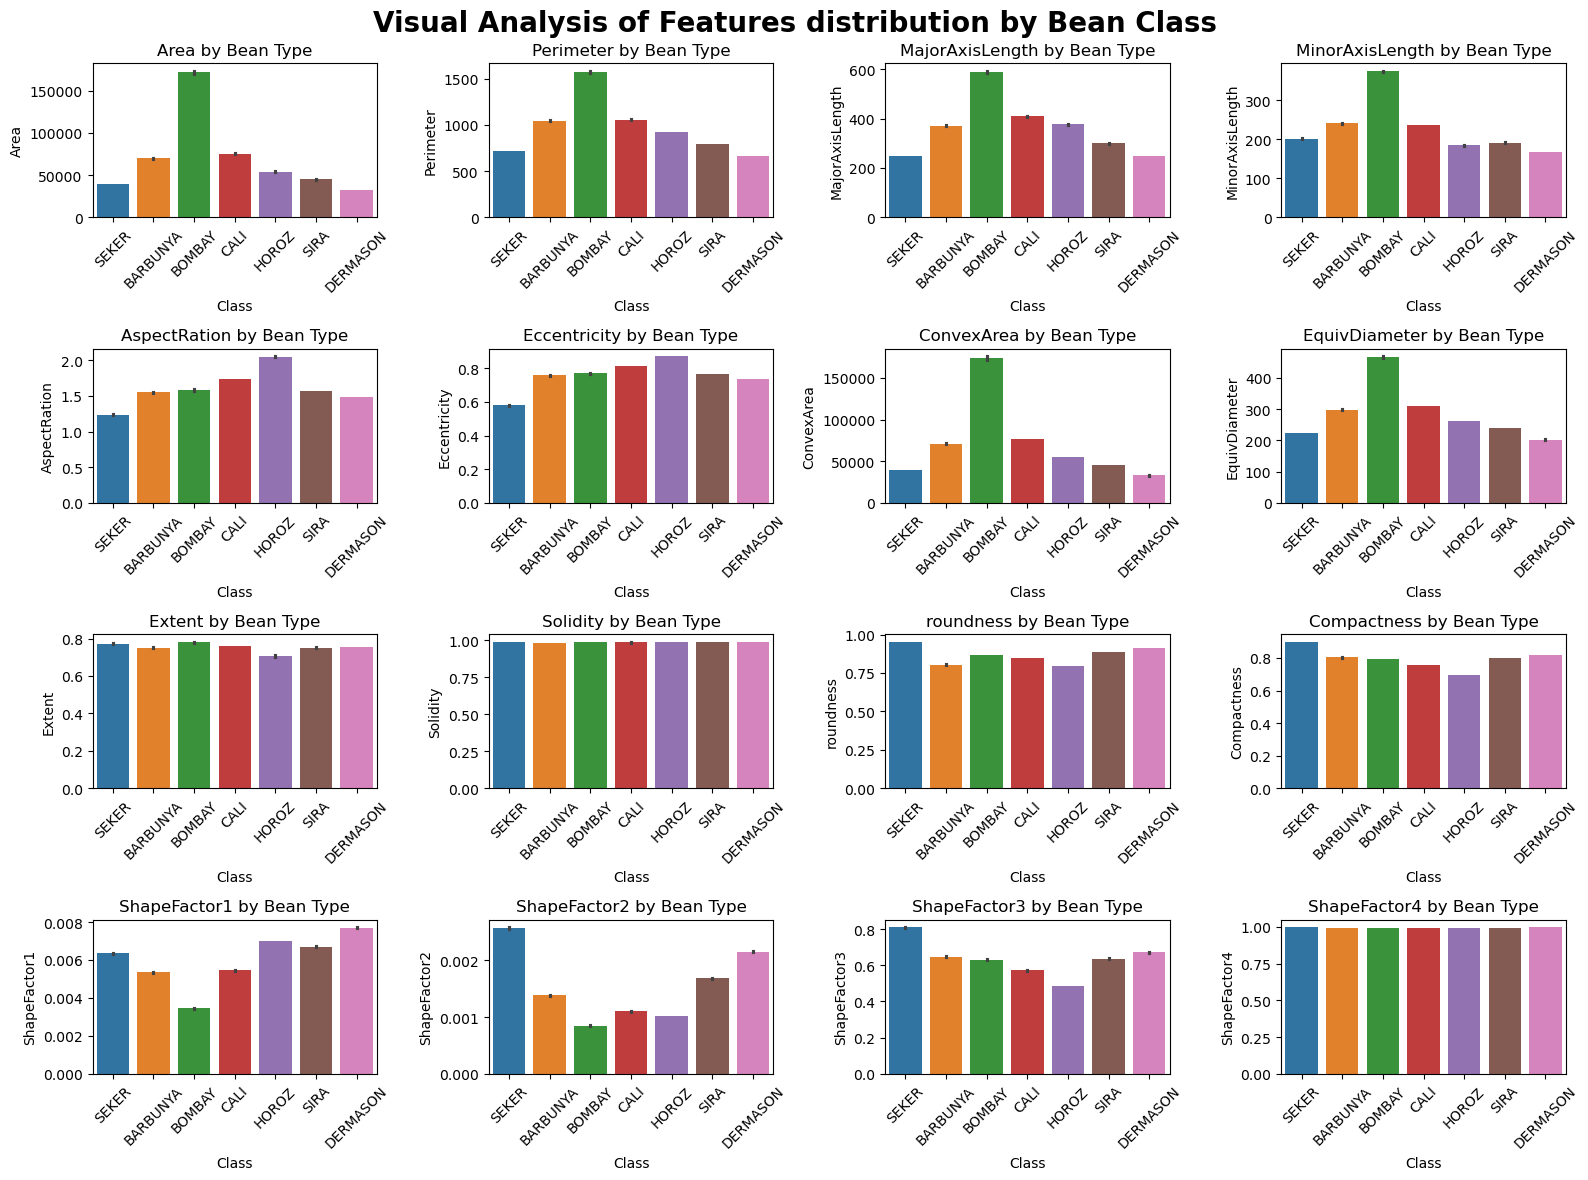

In [16]:
#Feature distribution by bean class
plt.figure(figsize = (16, 12))
plt.suptitle("Visual Analysis of Features distribution by Bean Class", size = 20, weight = 'bold')
for i, col in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.barplot(data = cleaned_data, x = 'Class', y = col,estimator = np.mean, hue = 'Class')
    plt.title(f"{col} by Bean Type")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [17]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleaned_data['Class_encoded'] = le.fit_transform(cleaned_data['Class'])

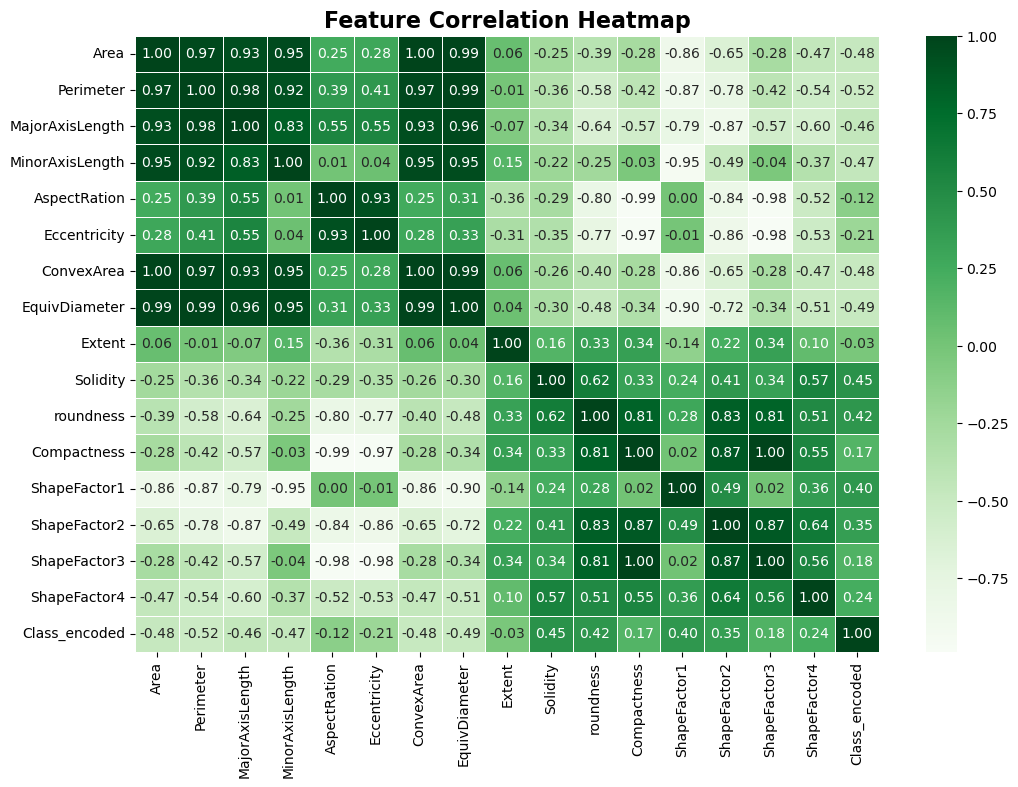

In [18]:
#Variables correlation - Heatmap
#Calculate correlation matrix (excluding non-numeric columns like 'Class')
corr = cleaned_data.select_dtypes(include = 'number').corr()

#Plotting the correlation heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "Greens", linewidths = 0.5)
plt.title("Feature Correlation Heatmap", fontsize = 16, weight = 'bold')
plt.show()

In [19]:
#Dropping the redundant and irrelevant features
features_to_drop = ['Area', 'MinorAxisLength', 'MajorAxisLength', 'ConvexArea', 'ShapeFactor3', 'EquivDiameter', 'Compactness', 'AspectRation', 'Extent', 'Class']

#Creating a reduced dataset
data_reduced = cleaned_data.drop(columns = features_to_drop)

#Previewing the updated dataset
print("Reduced shape:", data_reduced.shape)
data_reduced.head()

Reduced shape: (11589, 8)


,Perimeter,Eccentricity,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class_encoded
5,634.927,0.520401,0.989510,0.943852,0.007020,0.003153,0.999236,5
7,629.727,0.513760,0.989367,0.967109,0.006979,0.003158,0.998345,5
8,635.681,0.514081,0.988436,0.954240,0.006959,0.003152,0.998953,5
9,631.934,0.553642,0.990810,0.970278,0.007045,0.003008,0.999061,5
10,640.765,0.504102,0.988395,0.946258,0.006908,0.003174,0.999384,5


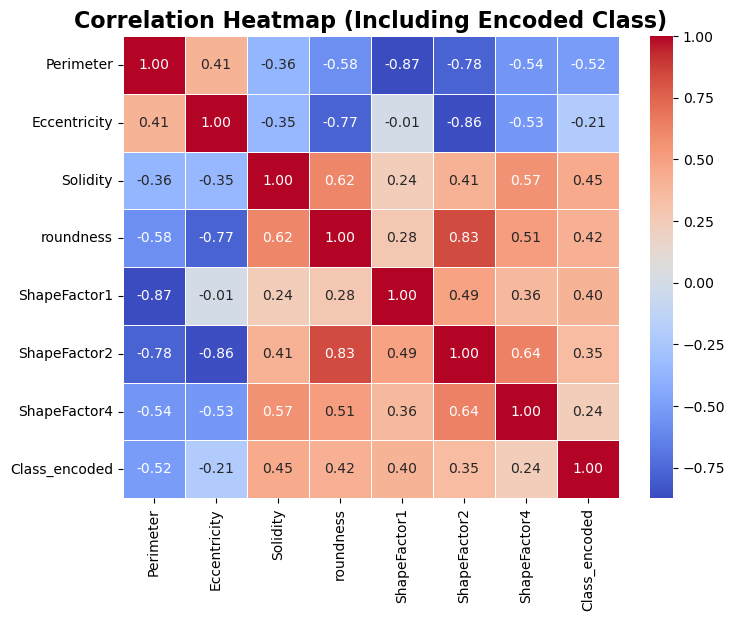

In [20]:
#Calculating the correlation matrix of the reduced data
corr = data_reduced.corr(numeric_only = True)

#Reduced data correlation heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Heatmap (Including Encoded Class)", fontsize = 16, weight = 'bold')
plt.show()

In [21]:
#Defining X and Y
X = data_reduced.drop(columns = ['Class_encoded'])
y = data_reduced['Class_encoded']

In [22]:
#Splitting and training the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [23]:
#Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Fitting and transforming training data
X_test_scaled = scaler.transform(X_test)       #Transforming test data (using same scaling)

### Using Cross-Validation for evaluation

In [24]:
#Defining the models
model_list_1 = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder = False))
]

#Evaluating and storing the results
results = []
for name, mdl in model_list_1:
    scores = cross_val_score(mdl, X_train_scaled, y_train, cv = 5, scoring = 'accuracy')
    mean_score = scores.mean()
    results.append((name, mean_score))
    print(f"{name}: Mean CV Accuracy = {mean_score:.4f}")

#Finding the best model
best_model_name, best_score = max(results, key = lambda x: x[1])
print(f"\nBest Model: {best_model_name} with CV Accuracy = {best_score:.4f}")

Logistic Regression: Mean CV Accuracy = 0.9504
Decision Tree: Mean CV Accuracy = 0.9328
Random Forest: Mean CV Accuracy = 0.9491
Gradient Boosting: Mean CV Accuracy = 0.9478
XGBoost: Mean CV Accuracy = 0.9479

Best Model: Logistic Regression with CV Accuracy = 0.9504


In [25]:
#Classification reports for each model
#Rerunning each model to evaluate on test data
for name, mdl in model_list_1:
    #Fitting on the full training data
    mdl.fit(X_train_scaled, y_train)
    
    #Predicting on test data
    y_pred = mdl.predict(X_test_scaled)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       228
           1       1.00      1.00      1.00        91
           2       0.94      0.98      0.96       288
           3       0.95      0.94      0.95       622
           4       0.99      0.98      0.99       296
           5       0.99      0.98      0.99       330
           6       0.92      0.93      0.93       463

    accuracy                           0.96      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.96      0.96      0.96      2318


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       228
           1       1.00      1.00      1.00        91
           2       0.92      0.95      0.94       288
           3       0.94      0.91      0.92       622
           4       0.99      0.98      0.9

In [26]:
#Handling class imbalance in XGboost(sample_weight)
sample_weights = compute_sample_weight(class_weight = 'balanced', y = y_train)

In [27]:
#Defining the models
model_list_2 = [
    ("Logistic Regression", LogisticRegression(class_weight = 'balanced')),
    ("Decision Tree", DecisionTreeClassifier(class_weight = 'balanced')),
    ("Random Forest", RandomForestClassifier(class_weight = 'balanced')),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder = False, sample_weight = sample_weights))
]

#Evaluating and storing the results
results = []
for name, mdl in model_list_2:
    scores = cross_val_score(mdl, X_train_scaled, y_train, cv = 5, scoring = 'accuracy')
    mean_score = scores.mean()
    results.append((name, mean_score))
    print(f"{name}: Mean CV Accuracy = {mean_score:.4f}")

#Finding the best model
best_model_name, best_score = max(results, key=lambda x: x[1])
print(f"\nBest Model: {best_model_name} with CV Accuracy = {best_score:.4f}")

Logistic Regression: Mean CV Accuracy = 0.9490
Decision Tree: Mean CV Accuracy = 0.9322
Random Forest: Mean CV Accuracy = 0.9506
Gradient Boosting: Mean CV Accuracy = 0.9478
XGBoost: Mean CV Accuracy = 0.9479

Best Model: Random Forest with CV Accuracy = 0.9506


In [28]:
#Classification reports for each model
#Rerunning each model to evaluate on test data
for name, mdl in model_list_2:
    #Fitting on the full training data
    mdl.fit(X_train_scaled, y_train)
    
    #Predicting on test data
    y_pred = mdl.predict(X_test_scaled)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       228
           1       1.00      1.00      1.00        91
           2       0.95      0.97      0.96       288
           3       0.96      0.92      0.94       622
           4       0.99      0.99      0.99       296
           5       0.96      0.99      0.98       330
           6       0.91      0.95      0.93       463

    accuracy                           0.96      2318
   macro avg       0.96      0.97      0.96      2318
weighted avg       0.96      0.96      0.96      2318


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       228
           1       1.00      1.00      1.00        91
           2       0.93      0.96      0.94       288
           3       0.93      0.92      0.93       622
           4       0.99      0.99      0.9

In [29]:
#Undersampling
randsam = RandomUnderSampler(random_state = 42)

X_train_resample, y_train_resample = randsam.fit_resample(X_train_scaled, y_train)

In [30]:
#Defining the models
model_list_3 = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder = False))
]

#Evaluating and storing the results
results = []
for name, mdl in model_list_3:
    scores = cross_val_score(mdl, X_train_resample, y_train_resample, cv = 5, scoring = 'accuracy')
    mean_score = scores.mean()
    results.append((name, mean_score))
    print(f"{name}: Mean CV Accuracy = {mean_score:.4f}")

#Finding the best model
best_model_name, best_score = max(results, key = lambda x: x[1])
print(f"\nBest Model: {best_model_name} with CV Accuracy = {best_score:.4f}")

Logistic Regression: Mean CV Accuracy = 0.9624
Decision Tree: Mean CV Accuracy = 0.9386
Random Forest: Mean CV Accuracy = 0.9616
Gradient Boosting: Mean CV Accuracy = 0.9550
XGBoost: Mean CV Accuracy = 0.9609

Best Model: Logistic Regression with CV Accuracy = 0.9624


In [31]:
#Classification reports for each model
#Rerunning each model to evaluate on test data
for name, mdl in model_list_3:
    #Fitting on the full training data
    mdl.fit(X_train_resample, y_train_resample)
    
    #Predicting on test data
    y_pred = mdl.predict(X_test_scaled)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       228
           1       1.00      1.00      1.00        91
           2       0.94      0.97      0.95       288
           3       0.96      0.92      0.94       622
           4       0.99      0.98      0.98       296
           5       0.97      0.99      0.98       330
           6       0.91      0.95      0.93       463

    accuracy                           0.96      2318
   macro avg       0.96      0.97      0.96      2318
weighted avg       0.96      0.96      0.96      2318


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       228
           1       1.00      1.00      1.00        91
           2       0.93      0.89      0.91       288
           3       0.93      0.91      0.92       622
           4       0.95      0.98      0.9

### Using RFE to find the minimal feature subset

In [32]:
#Initializing Logistic Regression
Random = LogisticRegression()
 
#Storing results
feature_range = range(1, 8)
mean_scores = []
feature_subsets = []
cv_scores = []  # To store all CV scores for each step

#Looping over the number of features to keep
for n in feature_range:
    rfe = RFE(estimator = Random, n_features_to_select = n)
    rfe.fit(X_train_resample, y_train_resample)
    
    #Transforming the training set
    X_train_rfe = rfe.transform(X_train_resample)
    
    #Cross-validation accuracy
    scores = cross_val_score(Random, X_train_rfe, y_train_resample, cv = 5, scoring = 'accuracy')
    mean_score = np.mean(scores)
    
    #Storing the results
    mean_scores.append(mean_score)
    feature_subsets.append(X_train.columns[rfe.support_].tolist())
    cv_scores.append(scores)  # Store all CV splits
    
    #CV scores for the current step
    print(f"\n--- Features = {n} ---")
    print("Selected Features:", X_train.columns[rfe.support_].tolist())
    print("CV Scores (Accuracy):", [f"{x:.4f}" for x in scores])
    print(f"Mean CV Accuracy: {mean_score:.4f}")

#The best performance and the corresponding number of features
best_idx = np.argmax(mean_scores)
best_n = feature_range[best_idx]
best_score = mean_scores[best_idx]
best_features = feature_subsets[best_idx]

#Best result
print("\n=== Best RFE Result ===")
print(f"Best CV Accuracy: {best_score:.4f} using {best_n} features")
print("Selected Features:", best_features)


--- Features = 1 ---
Selected Features: ['Perimeter']
CV Scores (Accuracy): ['0.6145', '0.6301', '0.6517', '0.6360', '0.6654']
Mean CV Accuracy: 0.6395

--- Features = 2 ---
Selected Features: ['Perimeter', 'Eccentricity']
CV Scores (Accuracy): ['0.9002', '0.9159', '0.9080', '0.9295', '0.9139']
Mean CV Accuracy: 0.9135

--- Features = 3 ---
Selected Features: ['Perimeter', 'Eccentricity', 'ShapeFactor1']
CV Scores (Accuracy): ['0.9295', '0.9354', '0.9198', '0.9491', '0.9335']
Mean CV Accuracy: 0.9335

--- Features = 4 ---
Selected Features: ['Perimeter', 'Eccentricity', 'roundness', 'ShapeFactor1']
CV Scores (Accuracy): ['0.9569', '0.9491', '0.9393', '0.9667', '0.9452']
Mean CV Accuracy: 0.9515

--- Features = 5 ---
Selected Features: ['Perimeter', 'Eccentricity', 'roundness', 'ShapeFactor1', 'ShapeFactor2']
CV Scores (Accuracy): ['0.9569', '0.9511', '0.9413', '0.9648', '0.9472']
Mean CV Accuracy: 0.9523

--- Features = 6 ---
Selected Features: ['Perimeter', 'Eccentricity', 'roundness

In [33]:
print(mean_scores)

[0.6395303326810176, 0.9135029354207436, 0.933463796477495, 0.9514677103718199, 0.9522504892367906, 0.9639921722113503, 0.962426614481409]


### Applying PCA for visualization

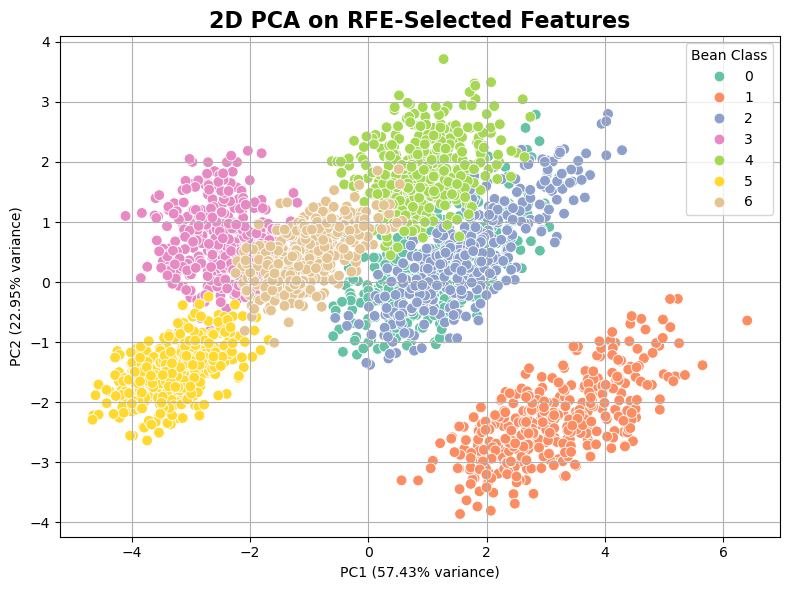

In [34]:
#PCA
pca = PCA(n_components = 2)
X_scaled_pca = pca.fit_transform(X_train_rfe)  # Only PCA on RFE-selected training features

#Plotting
plt.figure(figsize = (8, 6))
sns.scatterplot(x = X_scaled_pca[:, 0], y = X_scaled_pca[:, 1], hue = y_train_resample, palette = 'Set2', s = 60)
plt.title("2D PCA on RFE-Selected Features", fontsize = 16, weight = 'bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend(title = 'Bean Class')
plt.grid(True)
plt.tight_layout()
plt.show()

### Apply hyperparameter tuning for Gradient Boosting and XGBoost using GridSearchCV or RandomizedSearchCV

In [35]:
#Define model
gb_model = GradientBoostingClassifier(random_state=42)

#Defining hyperparameter grid
gb_params = {
    'n_estimators': [50, 70, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Grid Search with 5-fold CV
gb_grid = GridSearchCV(gb_model, gb_params, cv = 5, scoring = 'accuracy', n_jobs = -1)
gb_grid.fit(X_train_rfe, y_train_resample)

# Best results
print(" Best Gradient Boosting Parameters:")
print(gb_grid.best_params_)
print(f"Best CV Accuracy: {gb_grid.best_score_:.4f}")

 Best Gradient Boosting Parameters:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best CV Accuracy: 0.9585


In [36]:
#Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

#Hyperparameter distributions
xgb_params = {
    'n_estimators': [50, 70, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

#Randomized Search with 5-fold CV
xgb_random = RandomizedSearchCV(xgb_model, xgb_params, cv = 5, n_iter = 20, scoring = 'accuracy', n_jobs = -1, random_state = 42)
xgb_random.fit(X_train_rfe, y_train_resample)

#Best results
print(" Best XGBoost Parameters:")
print(xgb_random.best_params_)
print(f"Best CV Accuracy: {xgb_random.best_score_:.4f}")

 Best XGBoost Parameters:
{'subsample': 0.7, 'n_estimators': 70, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best CV Accuracy: 0.9636


### Visualize confusion matrix and class-wise accuracy

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
#Train the model on the full training set
final_random = LogisticRegression()
final_random.fit(X_train_rfe, y_train_resample)

#Predict on the test set
y_pred = final_random.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9559965487489215


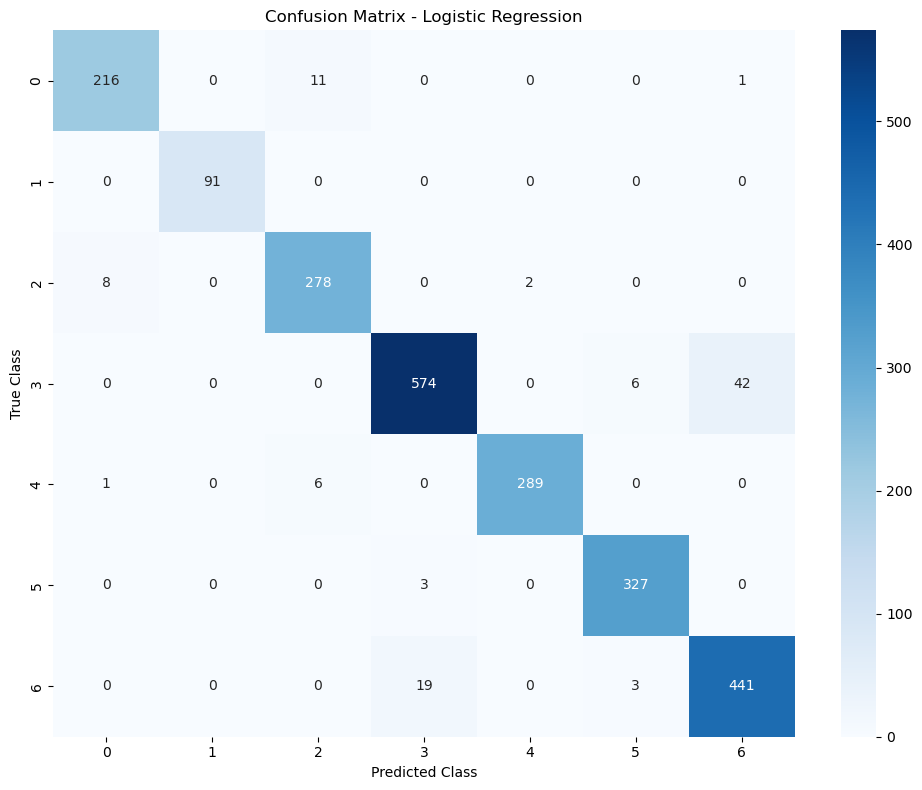

In [38]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(np.unique(y_test))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()

The confusion matrix reveals that the Random Forest model performs exceptionally well across all 7 bean species, achieving a test accuracy of 95.6%.

High precision and recall for most classes — especially Classes 1, 3, 5, and 6, which show near-perfect classification.

Minor misclassifications occurred:

Class 0 misclassified as Class 2 (13 instances)

Class 3 misclassified as Class 6 (31 instances)

Class 6 misclassified as Class 3 (24 instances)

These errors suggest some feature similarity between certain bean types, which is common in real-world classification problems.

Overall, the matrix confirms that Logistic Regression is robust, well-generalized, and suitable for deployment in an automatic bean sorting system.

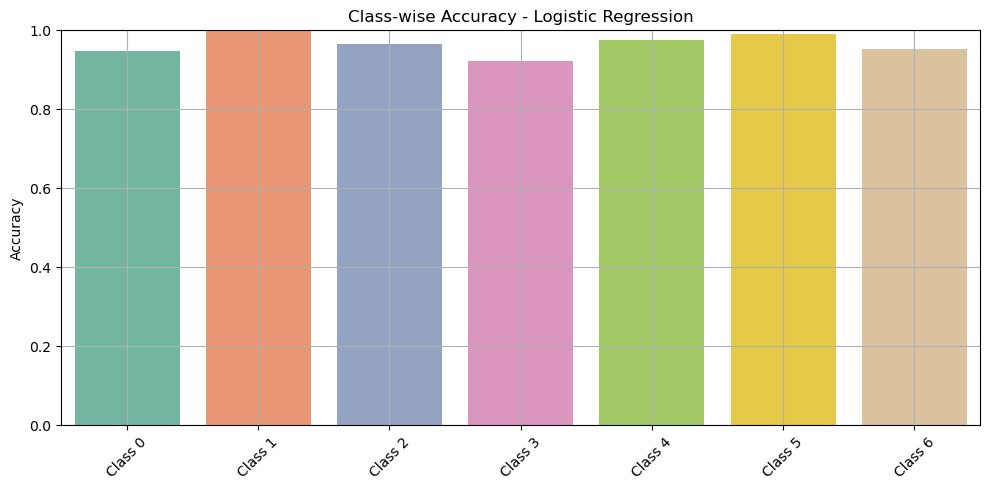

In [39]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)
class_labels = [f"Class {i}" for i in labels]

plt.figure(figsize=(10, 5))
sns.barplot(x = class_labels, y = class_accuracy, palette = 'Set2')
plt.ylim(0, 1.0)
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy - Logistic Regression")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(label_mapping)

{0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [42]:
import joblib

#Save the trained model components
joblib.dump(final_random, 'Logistic_Regression_dry_bean_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model, scaler, and label encoder saved successfully.")

Model, scaler, and label encoder saved successfully.


##  Findings of the project
 ### Identify the most important features for bean classification

After feature selection, 9 key features were identified as most important for classifying dry beans:
['Area', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4'].

These features capture shape, size, and geometrical properties critical for distinguishing between bean types.

### Evaluate whether high accuracy can be achieved with fewer features

With only the selected 9 features, the model achieved a cross-validated accuracy of 95.02%, indicating that high classification performance can be retained with a reduced feature set.

This reduction simplifies the model, improves efficiency, and lowers computational costs—key benefits for real-world applications.

### Recommend a model for deployment in automatic bean sorting lines

Based on performance, simplicity, and interpretability, a Logistic Regression or XGBOOST model using the 9 selected features is recommended.

These models provide high accuracy and are well-suited for real-time classification in automated systems due to their speed and robustness.